In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
scaler = StandardScaler()

In [2]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [3]:
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test
train_x_sc = scaler.fit_transform(train_x)
test_x_sc = scaler.transform(test_x)

In [65]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [70]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [85]:
test.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,...,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,359.327805,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,...,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,223.928862,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,...,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,1.000000,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,...,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,174.000000,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,...,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,346.000000,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,...,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,525.000000,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,...,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,1000.000000,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,...,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


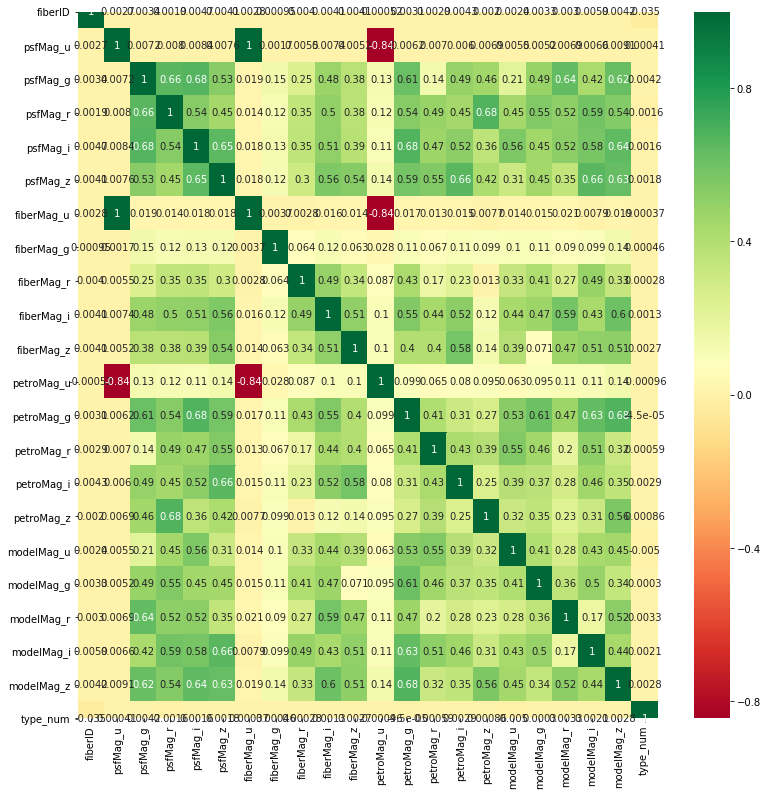

In [4]:
corrmat = train.corr()
plt.figure(figsize=(13,13))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

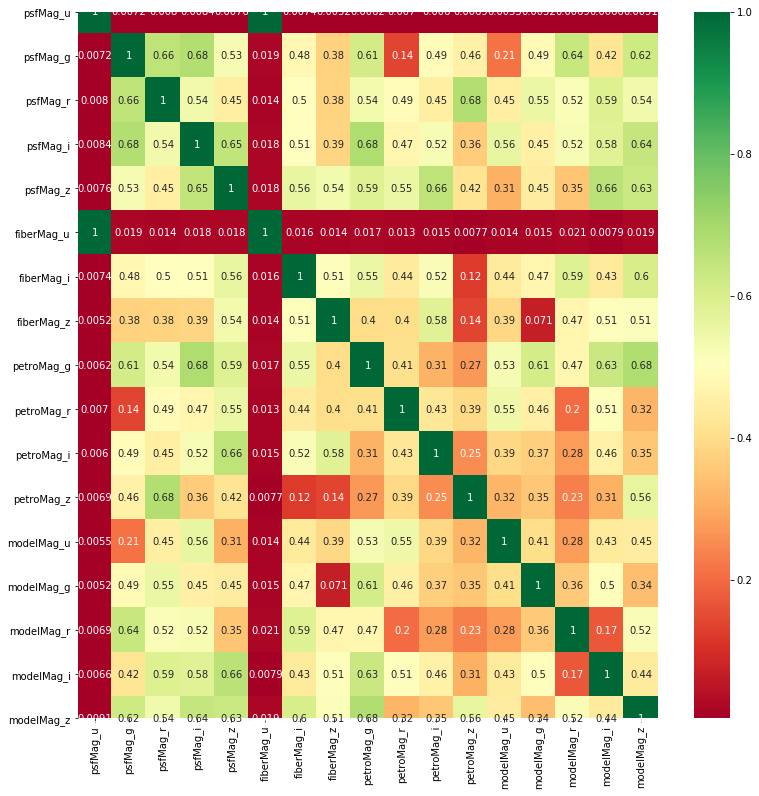

In [5]:

top_corr_features = []
corr_col = corrmat.columns
for col in corr_col:
    if (corrmat[col].sort_values(ascending=False)[1] > 0.5)&(corrmat[col].sort_values(ascending=False)[1] < 1):
        top_corr_features.append(col)
plt.figure(figsize=(13,13))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

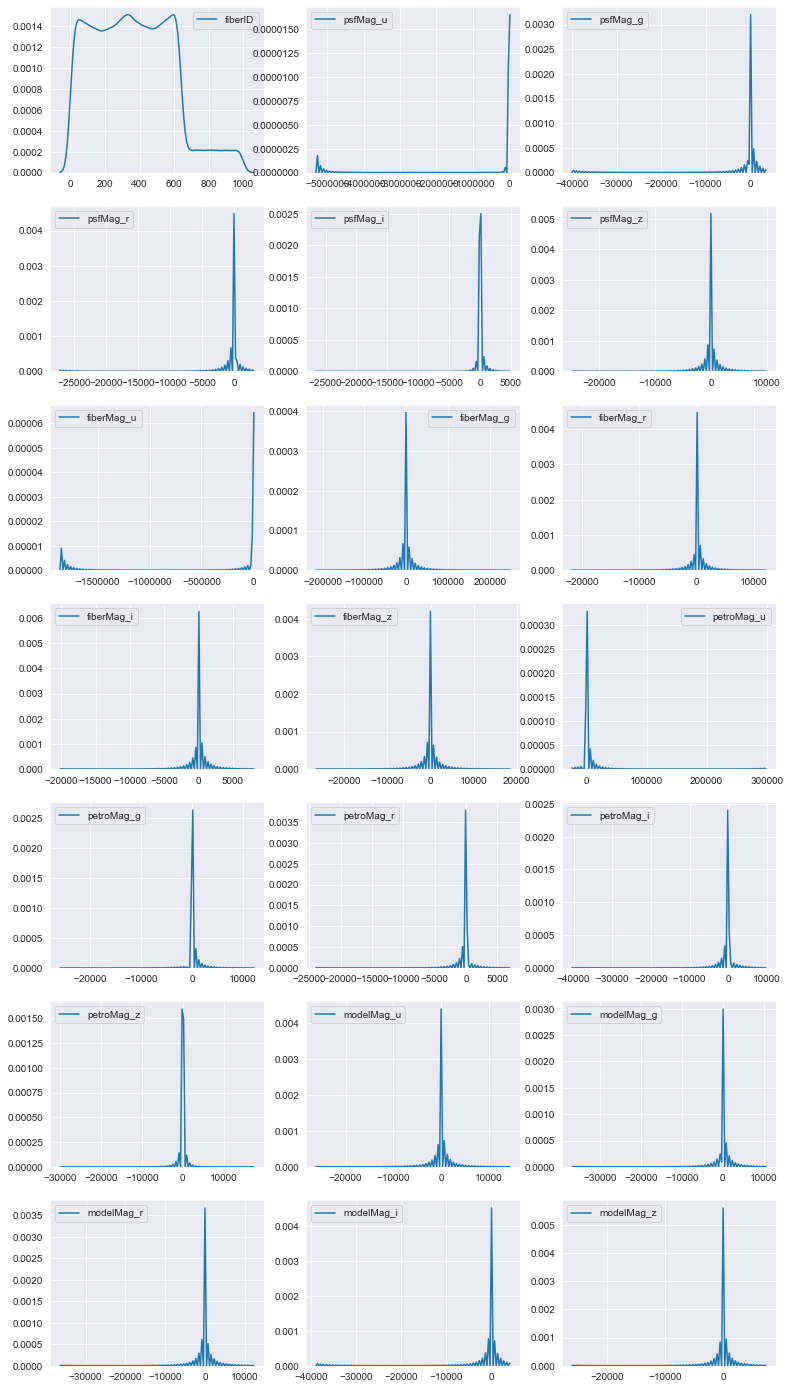

In [69]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(pd.DataFrame(train_x).iloc[:,i],)

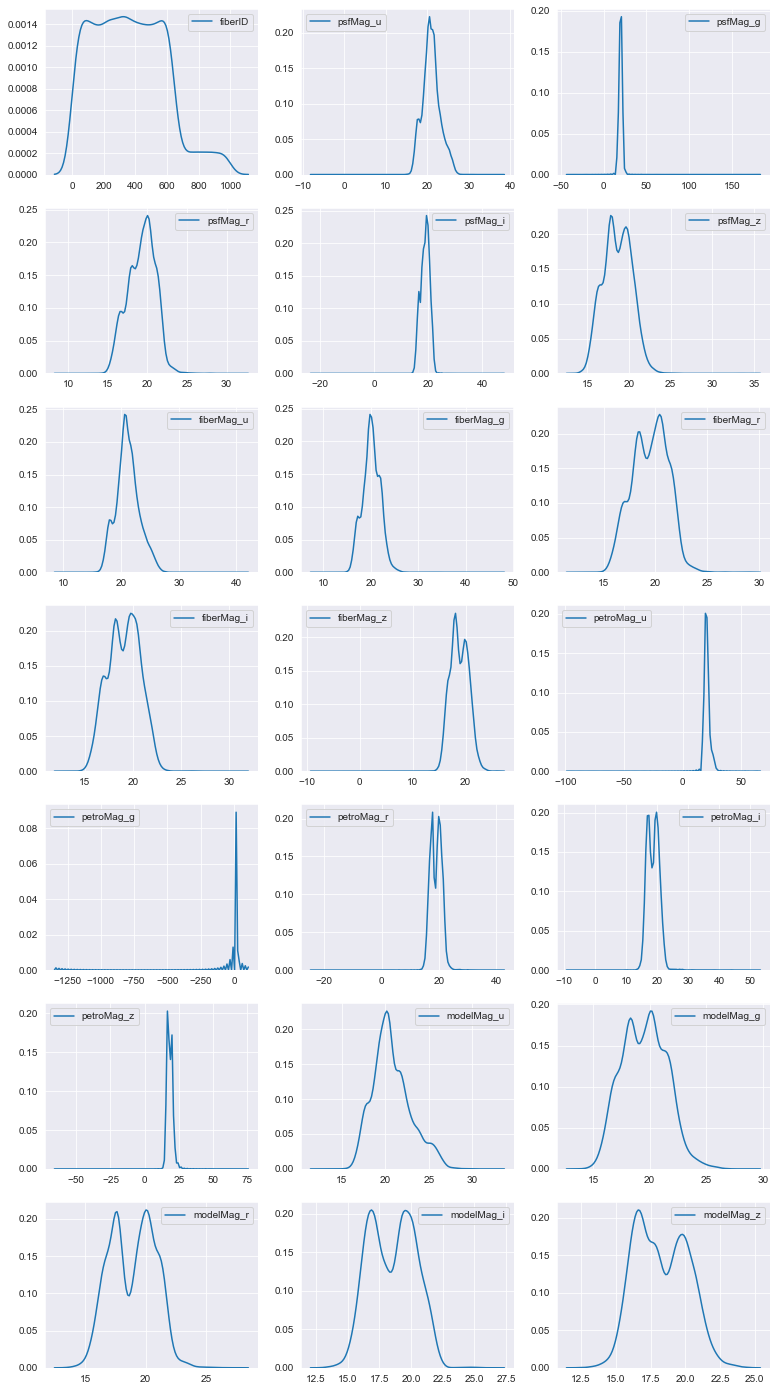

In [84]:
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(pd.DataFrame(test_x).iloc[:,i],)

In [81]:
train.shape

(199991, 22)

In [83]:
train[train["psfMag_u"]<-1e+05]

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
139197,QSO,94,-5.310802e+06,21.535095,21.146686,21.165407,21.019265,-1.864766e+06,21.754868,21.673284,...,298771.019041,21.537081,20.943557,21.748906,26.171039,28.232406,21.381924,21.130372,21.187048,21.092828


In [76]:
test[test["psfMag_u"]<-2e+06]

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,


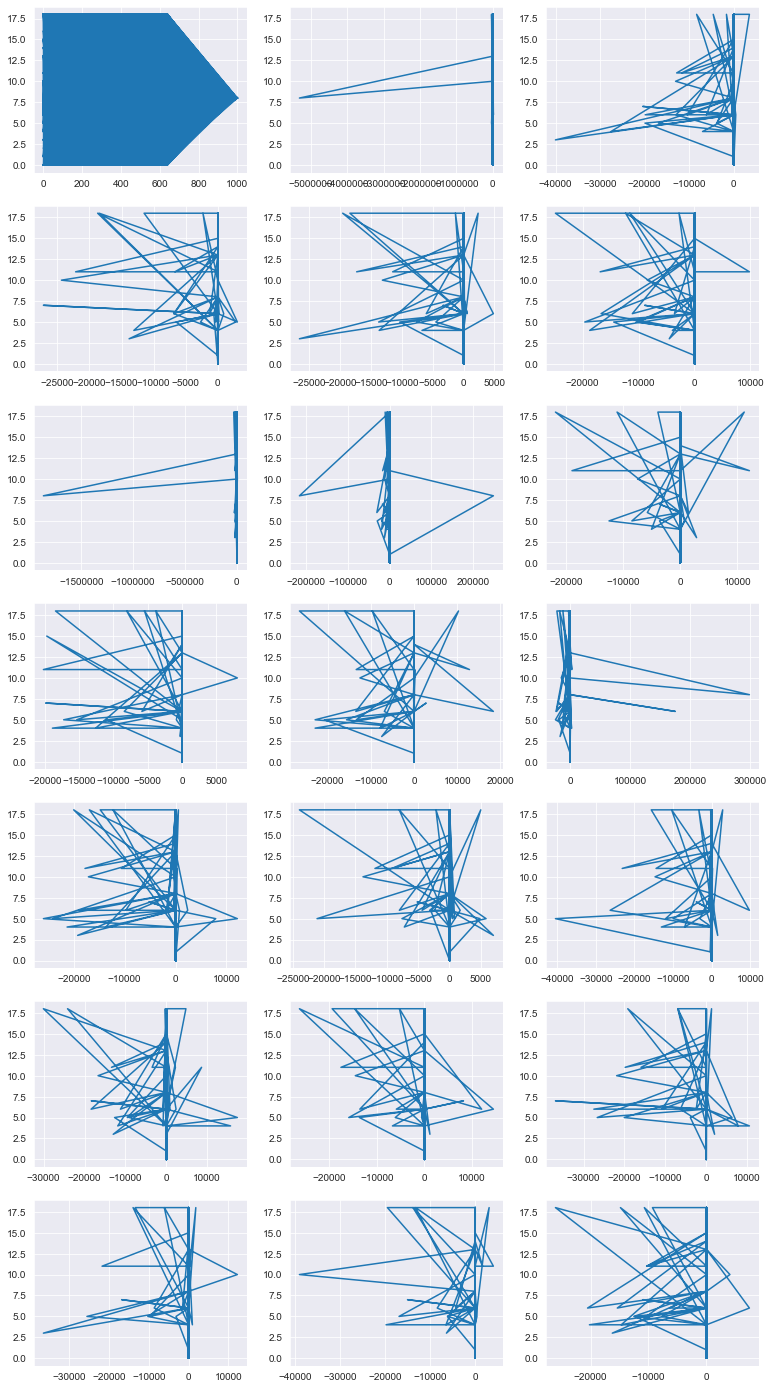

In [30]:
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    plt.plot(train_x.iloc[:,i],train_y)

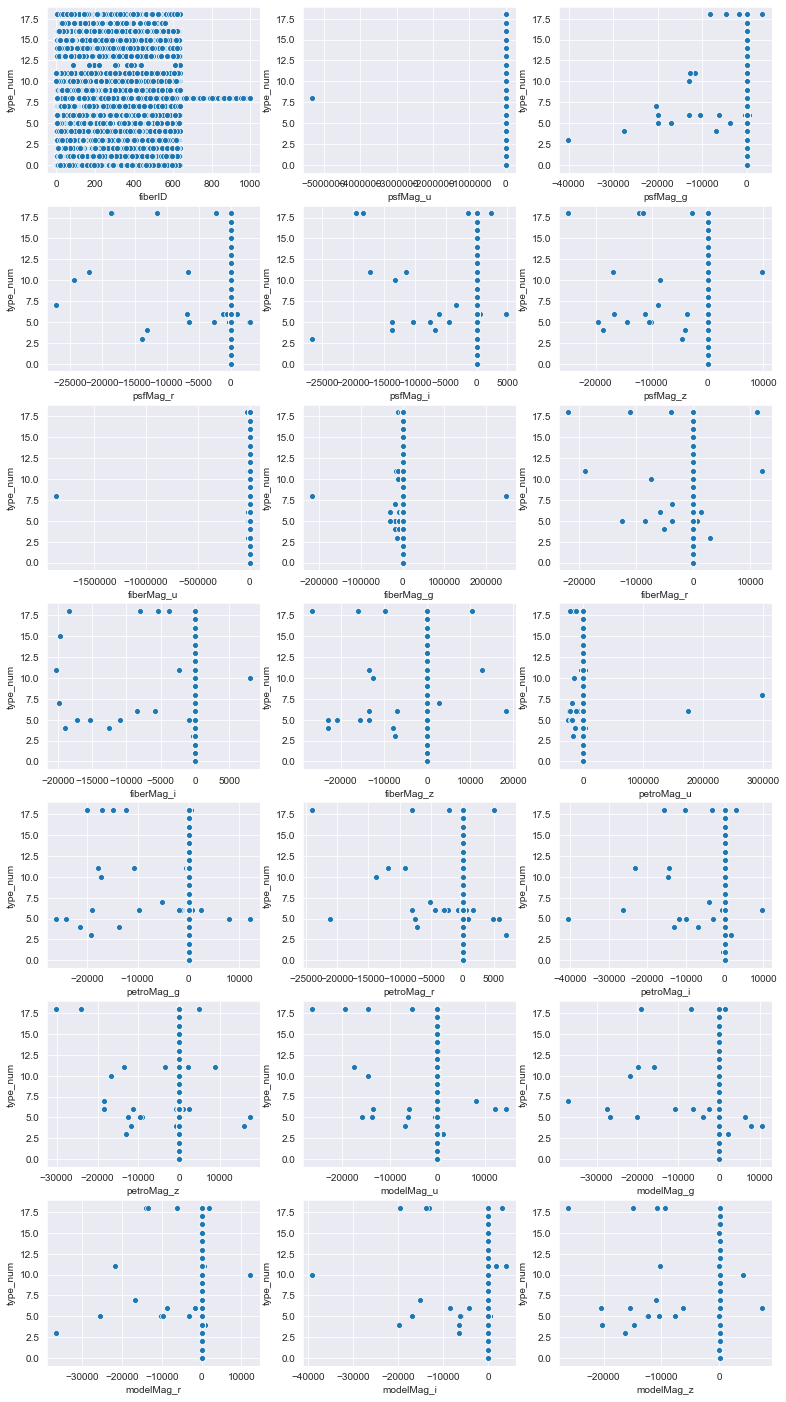

In [94]:
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    sns.scatterplot(train_x.iloc[:,i],train_y,data=train)

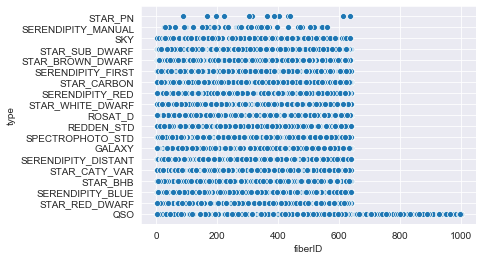

In [35]:
sns.scatterplot(train_x.iloc[:,0],train["type"],data=train)

In [36]:
train[train["type"]!="QSO"]["fiberID"].max()

640

### $\Rightarrow$ fiberID가 640 이상이면 QSO로 판단

In [132]:
train1 = train[train["fiberID"]<641].drop(["fiberMag_u","psfMag_u"],axis=1).reset_index(drop=True)
train_x[train_x<-3000].notnull().sum()

fiberID        0
psfMag_u      17
psfMag_g      17
psfMag_r      12
psfMag_i      14
psfMag_z      16
fiberMag_u    15
fiberMag_g    18
fiberMag_r    11
fiberMag_i    14
fiberMag_z    14
petroMag_u    15
petroMag_g    15
petroMag_r    12
petroMag_i    14
petroMag_z    13
modelMag_u    12
modelMag_g    13
modelMag_r    11
modelMag_i    13
modelMag_z    17
dtype: int64

In [117]:
feature_col = train1.columns.difference(["type","fiberID"])
feature_col

Index(['fiberMag_g', 'fiberMag_i', 'fiberMag_r', 'fiberMag_z', 'modelMag_g',
       'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z', 'petroMag_g',
       'petroMag_i', 'petroMag_r', 'petroMag_u', 'petroMag_z', 'psfMag_g',
       'psfMag_i', 'psfMag_r', 'psfMag_z'],
      dtype='object')

In [153]:
# from tqdm import tqdm
# for i in tqdm(range(train1.shape[0])):
#     if np.all(train1[feature_col].loc[i] < - 3000):
#         train1.drop(train1[train1[feature_col].loc[i]<-3000],inplace= True)
# train1.shape

(22, 20)

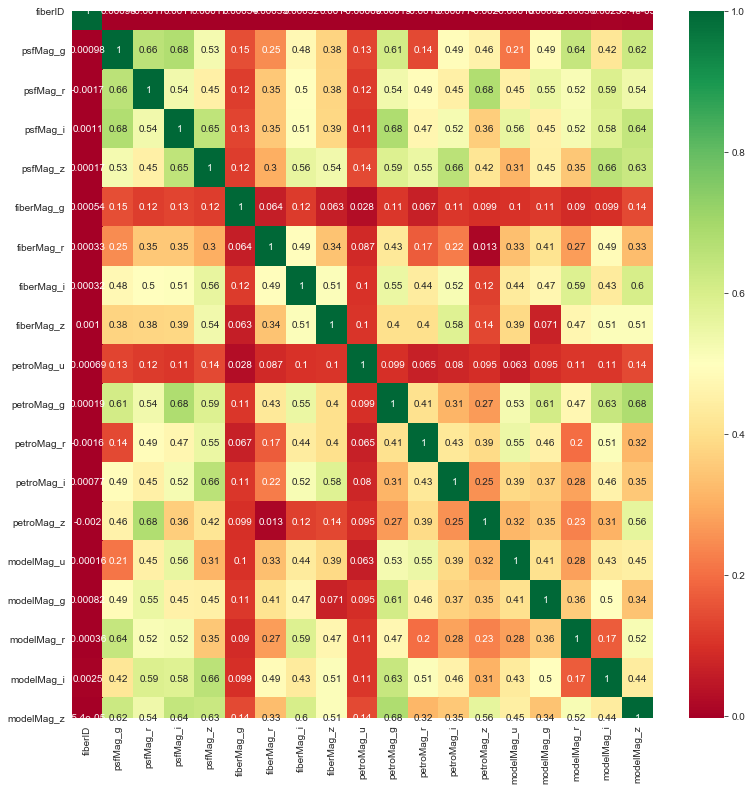

In [98]:
corrmat = train1.drop(["fiberMag_u","psfMag_u"],axis=1).corr()
plt.figure(figsize=(13,13))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

                      type
QSO                  49680
GALAXY               37347
SERENDIPITY_BLUE     21760
SPECTROPHOTO_STD     14630
REDDEN_STD           14618
STAR_RED_DWARF       13750
STAR_BHB             13500
SERENDIPITY_FIRST     7132
ROSAT_D               6580
STAR_CATY_VAR         6506
SERENDIPITY_DISTANT   4654
STAR_CARBON           3257
SERENDIPITY_RED       2562
STAR_WHITE_DWARF      2160
STAR_SUB_DWARF        1154
STAR_BROWN_DWARF       500
SKY                    127
SERENDIPITY_MANUAL      61
STAR_PN                 13


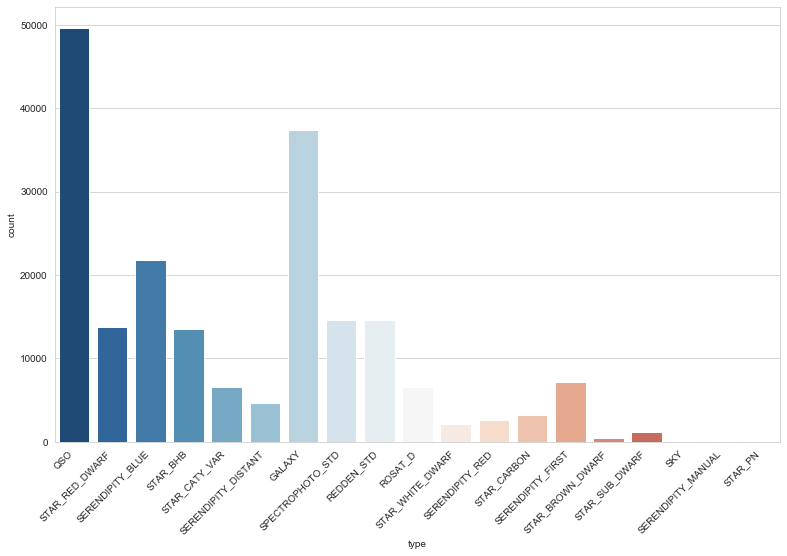

In [19]:
print(pd.DataFrame(train["type"].value_counts()))
plt.figure(figsize=(13,8))
plt.xticks(rotation =  45 ,horizontalalignment='right')
sns.set_style('whitegrid')
sns.countplot(x='type',data=train,palette='RdBu_r')

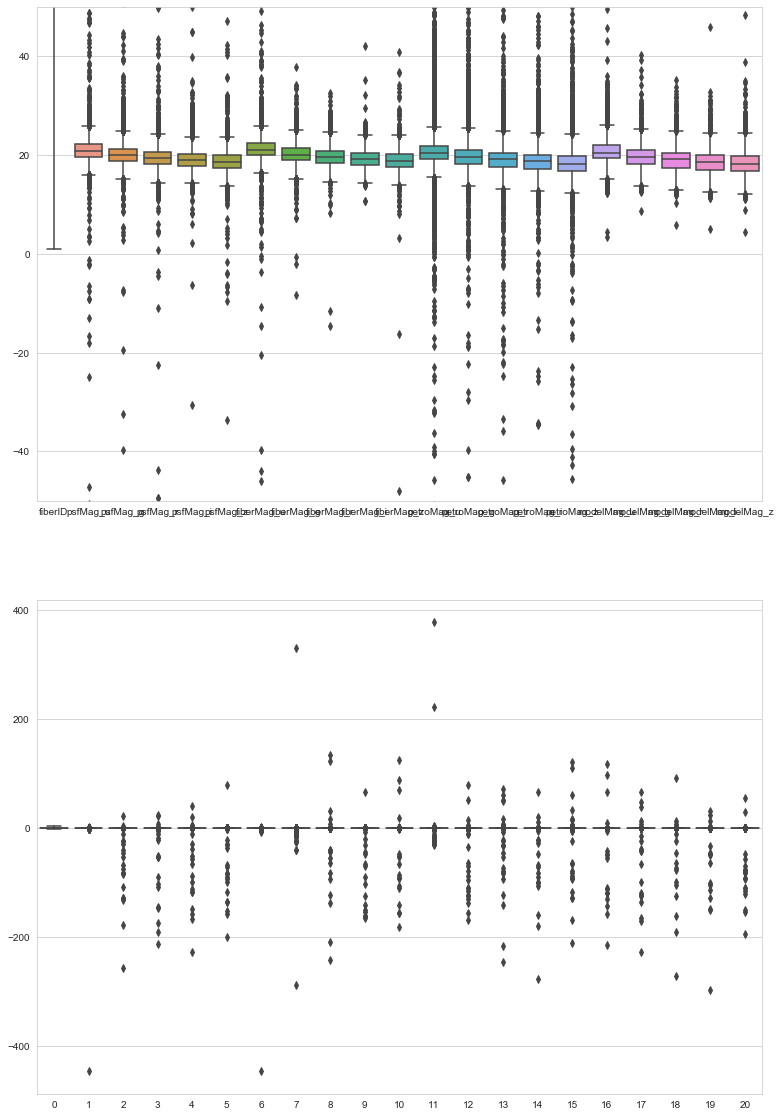

In [23]:
plt.figure(figsize=(13,20))
plt.ylim(-50,50)
plt.subplot(211)
sns.boxplot(data=pd.DataFrame(train_x))
plt.subplot(212)
sns.boxplot(data=pd.DataFrame(train_x_sc))

KeyboardInterrupt: 

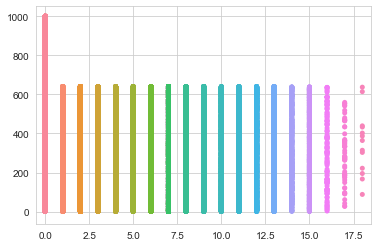

In [20]:
sns.swarmplot(x='type', y='fiberID', data=train)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_x_sc,train_y,test_size=0.2,shuffle=True)

In [13]:
import lightgbm as lgb
train_set = lgb.Dataset(x_train, y_train, silent=False)
valid_set = lgb.Dataset(x_val, y_val, silent=False)

lgb_param = {'boosting_type':'gbdt',
             'num_leaves': 40,
             'max_depth': -1,
            'learning_rate': 0.0075, 
            'bagging_fraction' : 1,
            'max_bin' : 5000 ,
            'bagging_freq': 20,
            'colsample_bytree': 0.6,
             'objective': 'multiclass', 
            'num_class': len(set(y_train)) + 1,
             'metric': 'multi_logloss',
             'min_split_gain': 0.5,
            'min_child_weight': 0.1,
            'min_child_samples': 5,
            'scale_pos_weight':1,
            'zero_as_missing': True,
            }
lgb_cv = lgb.cv(params = lgb_param, train_set = train_set ,
                      num_boost_round=1000, early_stopping_rounds=50,
                      verbose_eval=50, nfold=5,seed=0) 

[50]	cv_agg's multi_logloss: 2.0279 + 0.00044442
[100]	cv_agg's multi_logloss: 1.88233 + 0.000761181


KeyboardInterrupt: 

In [17]:
print('\nBest num_boost_round:', len(lgb_cv['multi_logloss-mean']))
print('Best CV score:', lgb_cv['multi_logloss-mean'][-1])
# lgb_model = lgb.train(params = lgb_param, train_set = train_set ,
#                       num_boost_round=len(lgb_cv['multi_logloss-mean']))


Best num_boost_round: 1000
Best CV score: 0.3935850083698379


dict_items([('multi_logloss-mean', [2.268367535427686, 2.2360337599466655, 2.20617114039067, 2.1778646726637034, 2.1511766181218093, 2.125479047216131, 2.1009965190181776, 2.077800932421276, 2.055103402385396, 2.0332757980793663, 2.012168522079763, 1.991751676785384, 1.971940956763342, 1.952836561574781, 1.9339337561993541, 1.9159100239216038, 1.898062734523582, 1.8807702332600893, 1.8638016034475355, 1.8471352227564601, 1.831049989822647, 1.8152442553434223, 1.800017624590269, 1.7848520177777814, 1.7702965622342302, 1.7557871724168066, 1.7418501676559912, 1.7278485728400277, 1.714302786680165, 1.7008309699510478, 1.6878054626814147, 1.6748728395661612, 1.6623099205220835, 1.6498617112342888, 1.6376591981170177, 1.6257397247713747, 1.6138346910167507, 1.6023636761257678, 1.5910811885396001, 1.579986215566732, 1.5689887499539419, 1.5580629217800936, 1.547440597715654, 1.5368781793626152, 1.5264499934032698, 1.5161152747602342, 1.5059589017456092, 1.4959496770185123, 1.4861936475605213, 

In [10]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=50, max_depth=20, learning_rate=0.007, n_estimators=1500, subsample_for_bin=200000, objective='multiclass', min_split_gain=0.5, min_child_weight=1, min_child_samples=15,random_state=42)
lgb_model = lgb_clf.fit(x_train,y_train)

In [11]:
y_preds = lgb_model.predict_proba(x_val)

In [45]:
y_test = lgb_model.predict_proba(test_x_sc)

In [13]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_en = encoder.fit_transform(np.array(y_val).reshape(-1,1))


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
log_loss(y_en.toarray(),y_preds)

0.37366606550456166

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# log_clf = LogisticRegression(solver='liblinear', random_state=42)
# rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
# svm_clf = SVC(gamma='auto', probability=True, random_state=42)

# voting_clf = VotingClassifier(
#     estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
#     voting='soft')
# voting_clf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import log_loss
for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict_proba(x_val)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [24]:
y_pred = forest.predict_proba(test_x_sc)

In [27]:
y_pred[0:5,:]

array([[0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.92,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  ,
        0.26, 0.  , 0.15, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  , 0.  ,
        0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.  ,
        0.05, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.76],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [47]:
y_test[0:5,:]

array([[8.83390999e-05, 2.42618047e-04, 1.91010784e-04, 3.45294095e-02,
        4.88408323e-04, 4.82503367e-04, 1.89503057e-03, 2.41719183e-04,
        5.36232379e-03, 4.77463793e-06, 9.48664664e-01, 5.53133711e-03,
        2.19817683e-06, 4.87157515e-04, 1.40567759e-04, 4.75171222e-04,
        7.57017991e-05, 2.50744993e-04, 8.46319907e-04],
       [1.61514607e-04, 4.44655307e-04, 4.01802872e-05, 1.59433434e-04,
        8.95124478e-04, 8.84302240e-04, 5.65203158e-03, 1.36507388e-03,
        6.08920884e-01, 8.75066022e-06, 8.71680556e-04, 1.80126629e-01,
        6.87674450e-06, 1.97477686e-01, 2.23929103e-04, 8.70864340e-04,
        7.19879041e-05, 7.13026184e-05, 1.74709355e-03],
       [1.45808998e-04, 6.29317041e-05, 1.00836415e-05, 2.46874477e-05,
        2.17625099e-04, 2.55288587e-04, 9.93583885e-01, 1.01939201e-04,
        2.74408486e-03, 1.28986441e-06, 1.27514365e-04, 1.78493038e-03,
        1.24235487e-06, 1.95877817e-04, 3.47826934e-04, 1.28367105e-04,
        1.26055683e-05

In [46]:
submission = pd.DataFrame(data=y_test, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submissions.csv', index=True)

In [38]:
y_en.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
rf_clf = RandomForestClassifier(n_estimators=500,
                          max_depth=15,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [19]:
rf_model = rf_clf.fit(x_train,y_train)

In [26]:
y_pred = rf_model.predict_proba(x_val)
log_loss(y_en.toarray(),y_pred)

0.3970927989118584

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

def run_gbt_model(n_estimators, l_rate):
    for ne, lr in zip(n_estimators, l_rate):
        print('---------- n_estimators : {}, learning_rate : {} ----------'.format(ne, lr))
        model = GradientBoostingClassifier(n_estimators=ne, learning_rate=lr)
        model.fit(x_train, y_train)
        y_pred = model.predict_proba(x_val)
        log_loss(y_en.toarrary(), y_pred)
        print('\n')

In [15]:
n_estimators = [100, 100, 100, 1000, 1000, 1000]
l_rate = [0.01, 0.03, 0.05, 0.01, 0.03, 0.05]
run_gbt_model(n_estimators, l_rate)

---------- n_estimators : 100, learning_rate : 0.01 ----------


AttributeError: toarrary not found

In [56]:
sample = pd.read_csv("submissions.csv", index_col='id')
count = 0
les = test_x["fiberID"]
for i in range(199991,199991+len(les)):
    if les[i] > 640 :
        sample.iloc[i-199991,:] = 0
        sample.iloc[i-199991,8] = 1

In [57]:
sample.head(14)

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.000088,0.000243,0.000191,0.034529,0.000488,0.000483,0.001895,0.000242,0.005362,4.774638e-06,0.948665,0.005531,2.198177e-06,0.000487,0.000141,0.000475,0.000076,0.000251,0.000846
199992,0.000162,0.000445,0.000040,0.000159,0.000895,0.000884,0.005652,0.001365,0.608921,8.750660e-06,0.000872,0.180127,6.876744e-06,0.197478,0.000224,0.000871,0.000072,0.000071,0.001747
199993,0.000146,0.000063,0.000010,0.000025,0.000218,0.000255,0.993584,0.000102,0.002744,1.289864e-06,0.000128,0.001785,1.242355e-06,0.000196,0.000348,0.000128,0.000013,0.000005,0.000249
199994,0.000132,0.000383,0.000026,0.000137,0.000733,0.000724,0.002009,0.005382,0.096550,7.161761e-06,0.000708,0.013153,2.945815e-05,0.022908,0.000183,0.000713,0.000059,0.000016,0.856149
199995,0.000027,0.000074,0.000032,0.000304,0.000149,0.000147,0.000497,0.000066,0.002085,1.451728e-06,0.992430,0.003425,5.492491e-07,0.000281,0.000052,0.000144,0.000012,0.000013,0.000260
199996,0.001548,0.000351,0.000017,0.000087,0.918567,0.042458,0.003498,0.000958,0.014811,4.538658e-06,0.000449,0.013195,3.252445e-06,0.000333,0.000228,0.000452,0.000040,0.000029,0.002973
199997,0.000520,0.000459,0.000029,0.000154,0.000821,0.001026,0.002250,0.316826,0.038143,8.023245e-06,0.000793,0.008308,2.010222e-04,0.008708,0.000205,0.000798,0.000066,0.008376,0.612307
199998,0.000649,0.000124,0.000009,0.000044,0.000229,0.016532,0.001187,0.000689,0.006120,2.315144e-06,0.000229,0.005408,1.415763e-06,0.000170,0.000069,0.967673,0.000020,0.000006,0.000837
199999,0.000058,0.000043,0.000003,0.000018,0.000096,0.000165,0.996101,0.000077,0.002326,9.413783e-07,0.000093,0.000609,5.720553e-07,0.000088,0.000035,0.000094,0.000008,0.000003,0.000181


In [58]:
sample.to_csv("submission_test.csv")

17.269388197455342